In [235]:
%matplotlib inline
#
# data manipulation and math
#
import numpy as np
#import scipy as sp
import pandas as pd
#
# plotting and visualization
#
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#
import seaborn as sns
#
#This is for multiple output on Jupyter Notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print('Loaded Libraries')

Loaded Libraries


In [236]:
#Setting Pandas and Matplotlib Options and Color Definitions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#
plt.rcParams['figure.figsize'] = (3, 3)
plt.rcParams['figure.dpi'] = 150      
#
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
#
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Define pastel color palette
pastel_palette = sns.color_palette('pastel')

# Extract colors from pastel palette
c0 = pastel_palette[0]
c1 = pastel_palette[1]
c2 = pastel_palette[2]

In [237]:
#Loading Data and Displaying Information
data= pd.read_csv('E:/Springboard Data Scientist BootCamp/PYTHON/GITHUB/HousePricePrediction/Data/EDA.csv')

print('The data have ', data.shape[0], ' rows and ', data.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(data.columns)))

The data have  1449  rows and  77  columns

column names: 

MSSubClass
MSZoning
LotFrontage
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
Fence
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [238]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Masonry,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,2008,WD,Normal,250000


In [239]:
data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1444,60,RL,62.000,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,No Masonry,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Fence,0,8,2007,WD,Normal,175000
1445,20,RL,85.000,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1446,70,RL,66.000,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,No Masonry,0.000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,0,5,2010,WD,Normal,266500
1447,20,RL,68.000,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,No Masonry,0.000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,292,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,No Fireplace,Attchd,1950.000,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,No Fence,0,4,2010,WD,Normal,142125
1448,20,RL,75.000,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,No Masonry,0.000,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,No Fireplace,Attchd,1965.000,Fin,1,276,TA,TA,Y,652,68,0,0,0,0,No Fence,0,6,2008,WD,Normal,147500


In [240]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = grab_col_names(data)


Observations: 1449
Variables: 77
cat_cols: 54
num_cols: 22
cat_but_car: 1
num_but_cat: 15


## Pre-processing and Training Data Development

### 1. Rare analysis 
Rare analysis aims to identify and handle infrequent categorical values in a dataset. Infrequent categorical values are those with very low frequencies, which can potentially lead to model inaccuracies or overfitting. This analysis helps to recognize such values and determine appropriate actions to take.

In [241]:
#Rare Analysis with Target Mean
def rare_analyser(df, target, cat_cols):
    for col in cat_cols:
        print(col, ':', len(df[col].value_counts()))
        print(pd.DataFrame({'Count': df[col].value_counts(),
                            'Ratio %': df[col].value_counts() / len(df),
                            'Target mean': df.groupby(col)[target].mean()}), end='\n\n\n')

rare_analyser(data, 'SalePrice', cat_cols)

MSZoning : 5
          Count  Ratio %  Target mean
MSZoning                             
C (all)      10    0.007    74528.000
FV           65    0.045   214014.062
RH           16    0.011   131558.375
RL         1146    0.791   190724.083
RM          212    0.146   124738.632


Street : 2
        Count  Ratio %  Target mean
Street                             
Grvl        5    0.003   110438.600
Pave     1444    0.997   180902.579


LotShape : 4
          Count  Ratio %  Target mean
LotShape                             
IR1         482    0.333   205930.035
IR2          39    0.027   237286.359
IR3           9    0.006   198373.889
Reg         919    0.634   164828.843


LandContour : 4
             Count  Ratio %  Target mean
LandContour                             
Bnk             63    0.043   143104.079
HLS             49    0.034   231586.673
Low             33    0.023   193266.667
Lvl           1304    0.900   180241.114


Utilities : 2
           Count  Ratio %  Target mean
Ut

MiscVal : 1
         Count  Ratio %  Target mean
MiscVal                             
0         1449    1.000   180659.432


YrSold : 5
        Count  Ratio %  Target mean
YrSold                             
2006      313    0.216   182736.518
2007      326    0.225   185638.887
2008      301    0.208   176982.542
2009      335    0.231   178624.096
2010      174    0.120   177872.948




#### Rare Category Encoder
The purpose of a rare encoder is to address these infrequent values. It works by grouping rare categories together under a single category or by merging them with other more common categories, thus balancing the dataset. This prevents rare categories from negatively impacting the model's performance and enhances its generalization ability. Especially in imbalanced datasets, a rare encoder can help improve the model's performance.

In [242]:
#Rare Category Encoder
def rare_encoder(df, rare_perc):
    temp_df = df.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

rare_encoder(data,0.01)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Rare,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Masonry,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,60,RL,62.000,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,No Masonry,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Fence,0,8,2007,WD,Normal,175000
1445,20,RL,85.000,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.000,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1446,70,RL,66.000,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,No Masonry,0.000,Ex,Gd,Rare,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.000,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,0,5,2010,WD,Normal,266500
1447,20,RL,68.000,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,No Masonry,0.000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,292,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,No Fireplace

### 2. New variable creating

In [243]:
data['NEW_1st*GrLiv'] = data['1stFlrSF'] * data['GrLivArea']

In [244]:
data['NEW_Garage*GrLiv'] = (data['GarageArea'] * data['GrLivArea'])

In [245]:
data["TotalQual"] = data[["OverallQual", "OverallCond"]].sum(axis = 1)

In [246]:
# Total Floor
data['NEW_TotalFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']

In [247]:
# Total Finished Basement Area
data['NEW_TotalBsmtFin'] = data.BsmtFinSF1 + data.BsmtFinSF2

In [248]:
# Porch Area
data['NEW_PorchArea'] = data.OpenPorchSF + data.EnclosedPorch + data.ScreenPorch + data['3SsnPorch'] + data.WoodDeckSF

In [249]:
# Total House Area
data['NEW_TotalHouseArea'] = data.NEW_TotalFlrSF + data.TotalBsmtSF

data['NEW_TotalSqFeet'] = data.GrLivArea + data.TotalBsmtSF

In [250]:
# Lot Ratio
data['NEW_LotRatio'] = data.GrLivArea / data.LotArea

data['NEW_RatioArea'] = data.NEW_TotalHouseArea / data.LotArea

data['NEW_GarageLotRatio'] = data.GarageArea / data.LotArea

In [251]:
# MasVnrArea
data['NEW_MasVnrRatio'] = data.MasVnrArea / data.NEW_TotalHouseArea 

In [252]:
# Dif Area
data['NEW_DifArea'] = (data.LotArea - data['1stFlrSF'] - data.GarageArea - data.NEW_PorchArea - data.WoodDeckSF)

data['NEW_OverallGrade'] = data['OverallQual'] * data['OverallCond']

data['NEW_Restoration'] = data.YearRemodAdd - data.YearBuilt

data['NEW_HouseAge'] = data.YrSold - data.YearBuilt 

data['NEW_RestorationAge'] = data.YrSold - data.YearRemodAdd

data['NEW_GarageAge'] = data.GarageYrBlt - data.YearBuilt 

data['NEW_GarageRestorationAge'] = np.abs(data.GarageYrBlt - data.YearRemodAdd) 

data['NEW_GarageSold'] = data.YrSold - data.GarageYrBlt

In [253]:
drop_list = ['Street', 'LandContour', 'Utilities', 'LandSlope','Heating', 'Neighborhood']

data.drop(drop_list, axis=1, inplace=True)

In [254]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,60,RL,65.000,8450,Reg,Inside,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,2008,WD,Normal,208500,1463760,937080,12,1710,706,61,2566,2566,0.202,0.304,0.065,0.076,6985,35,0,5,5,0.000,0.000,5.000
1,20,RL,80.000,9600,Reg,FR2,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,2007,WD,Normal,181500,1592644,580520,14,1262,978,298,2524,2524,0.131,0.263,0.048,0.000,7282,48,0,31,31,0.000,0.000,31.000
2,60,RL,68.000,11250,IR1,Inside,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,2008,WD,Normal,223500,1643120,1085888,12,1786,486,42,2706,2706,0.159,0.241,0.054,0.060,9680,35,1,7,6,0.000,1.000,7.000
3,70,RL,60.000,9550,IR1,Corner,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Masonry,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000,1650037,1102314,12,1717,216,307,2473,2473,0.180,0.259,0.067,0.000,7640,35,55,91,36,83.000,28.000,8.000
4,60,RL,84.000,14260,IR1,FR2,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,2008,WD,Normal,250000,2516710,1837528,13,2198,655,276,3343,3343,0.154,0.234,0.059,0.105,11811,40,0,8,8,0.000,0.000,8.000


### 3. Label Encoding & One-Hot Encoding

Both label encoding and one-hot encoding are essential preprocessing steps to ensure that categorical data can be effectively utilized by machine learning algorithms. The choice between these techniques depends on the nature of the categorical variables and the requirements of the specific machine learning algorithm being employed.

In [255]:
cat_cols, cat_but_car, num_cols = grab_col_names(data)

Observations: 1449
Variables: 91
cat_cols: 49
num_cols: 42
cat_but_car: 0
num_but_cat: 15


In [256]:
def label_encoder(df, binary_col):
    labelencoder = LabelEncoder()
    df[binary_col] = labelencoder.fit_transform(df[binary_col])
    return df

In [257]:
binary_cols = [col for col in data.columns if data[col].dtypes == 'O' and len(data[col].unique()) == 2]

In [258]:
for col in binary_cols:
    label_encoder(data, col)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,60,RL,65.000,8450,Reg,Inside,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,2008,WD,Normal,208500,1463760,937080,12,1710,706,61,2566,2566,0.202,0.304,0.065,0.076,6985,35,0,5,5,0.000,0.000,5.000
1,20,RL,80.000,9600,Reg,FR2,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1,SBrkr,1262,0,0,1262,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,2007,WD,Normal,181500,1592644,580520,14,1262,978,298,2524,2524,0.131,0.263,0.048,0.000,7282,48,0,31,31,0.000,0.000,31.000
2,60,RL,68.000,11250,IR1,Inside,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,2008,WD,Normal,223500,1643120,1085888,12,1786,486,42,2706,2706,0.159,0.241,0.054,0.060,9680,35,1,7,6,0.000,1.000,7.000
3,70,RL,60.000,9550,IR1,Corner,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Masonry,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000,1650037,1102314,12,1717,216,307,2473,2473,0.180,0.259,0.067,0.000,7640,35,55,91,36,83.000,28.000,8.000
4,60,RL,84.000,14260,IR1,FR2,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,2008,WD,Normal,250000,2516710,1837528,13,2198,655,276,3343,3343,0.154,0.234,0.059,0.105,11811,40,0,8,8,0.000,0.000,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,60,RL,62.000,7917,Reg,Inside,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,No Masonry,0.000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,Ex,1,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.000,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,No Fence,0,8,2007,WD,Normal,175000,1569591,757620,11,1647,0,40,2600,2600,0.208,0.328,0.058,0.000,6464,30,1,8,7,0.000,1.000,8.000
1445,20,RL,85.000,13175,Reg,Inside,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.000,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,TA,1,SBrkr,2073,0,0,2073,1,0,2,0,3,

In [259]:
def one_hot_encoder(df, cat_cols):
    df = pd.get_dummies(df, columns = cat_cols, drop_first = True)
    return df

In [260]:
one_hot_encoder(data, cat_cols)

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_1,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1,BsmtFullBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_7,Fireplaces_1,Fireplaces_2,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,60,65.000,8450,7,2003,2003,196.000,706,0,150,856,856,854,1710,8,2003.000,54

In [261]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_1st*GrLiv,NEW_Garage*GrLiv,TotalQual,NEW_TotalFlrSF,NEW_TotalBsmtFin,NEW_PorchArea,NEW_TotalHouseArea,NEW_TotalSqFeet,NEW_LotRatio,NEW_RatioArea,NEW_GarageLotRatio,NEW_MasVnrRatio,NEW_DifArea,NEW_OverallGrade,NEW_Restoration,NEW_HouseAge,NEW_RestorationAge,NEW_GarageAge,NEW_GarageRestorationAge,NEW_GarageSold
0,60,RL,65.000,8450,Reg,Inside,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,2008,WD,Normal,208500,1463760,937080,12,1710,706,61,2566,2566,0.202,0.304,0.065,0.076,6985,35,0,5,5,0.000,0.000,5.000
1,20,RL,80.000,9600,Reg,FR2,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1,SBrkr,1262,0,0,1262,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,2007,WD,Normal,181500,1592644,580520,14,1262,978,298,2524,2524,0.131,0.263,0.048,0.000,7282,48,0,31,31,0.000,0.000,31.000
2,60,RL,68.000,11250,IR1,Inside,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,2008,WD,Normal,223500,1643120,1085888,12,1786,486,42,2706,2706,0.159,0.241,0.054,0.060,9680,35,1,7,6,0.000,1.000,7.000
3,70,RL,60.000,9550,IR1,Corner,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,No Masonry,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000,1650037,1102314,12,1717,216,307,2473,2473,0.180,0.259,0.067,0.000,7640,35,55,91,36,83.000,28.000,8.000
4,60,RL,84.000,14260,IR1,FR2,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,2008,WD,Normal,250000,2516710,1837528,13,2198,655,276,3343,3343,0.154,0.234,0.059,0.105,11811,40,0,8,8,0.000,0.000,8.000


### 4. Scale Standardization

Each numerical column will be transformed to have a normal distribution with a mean of 0 and a standard deviation of 1. This enables proper comparisons between different numerical features in our dataset and helps machine learning algorithms perform better.

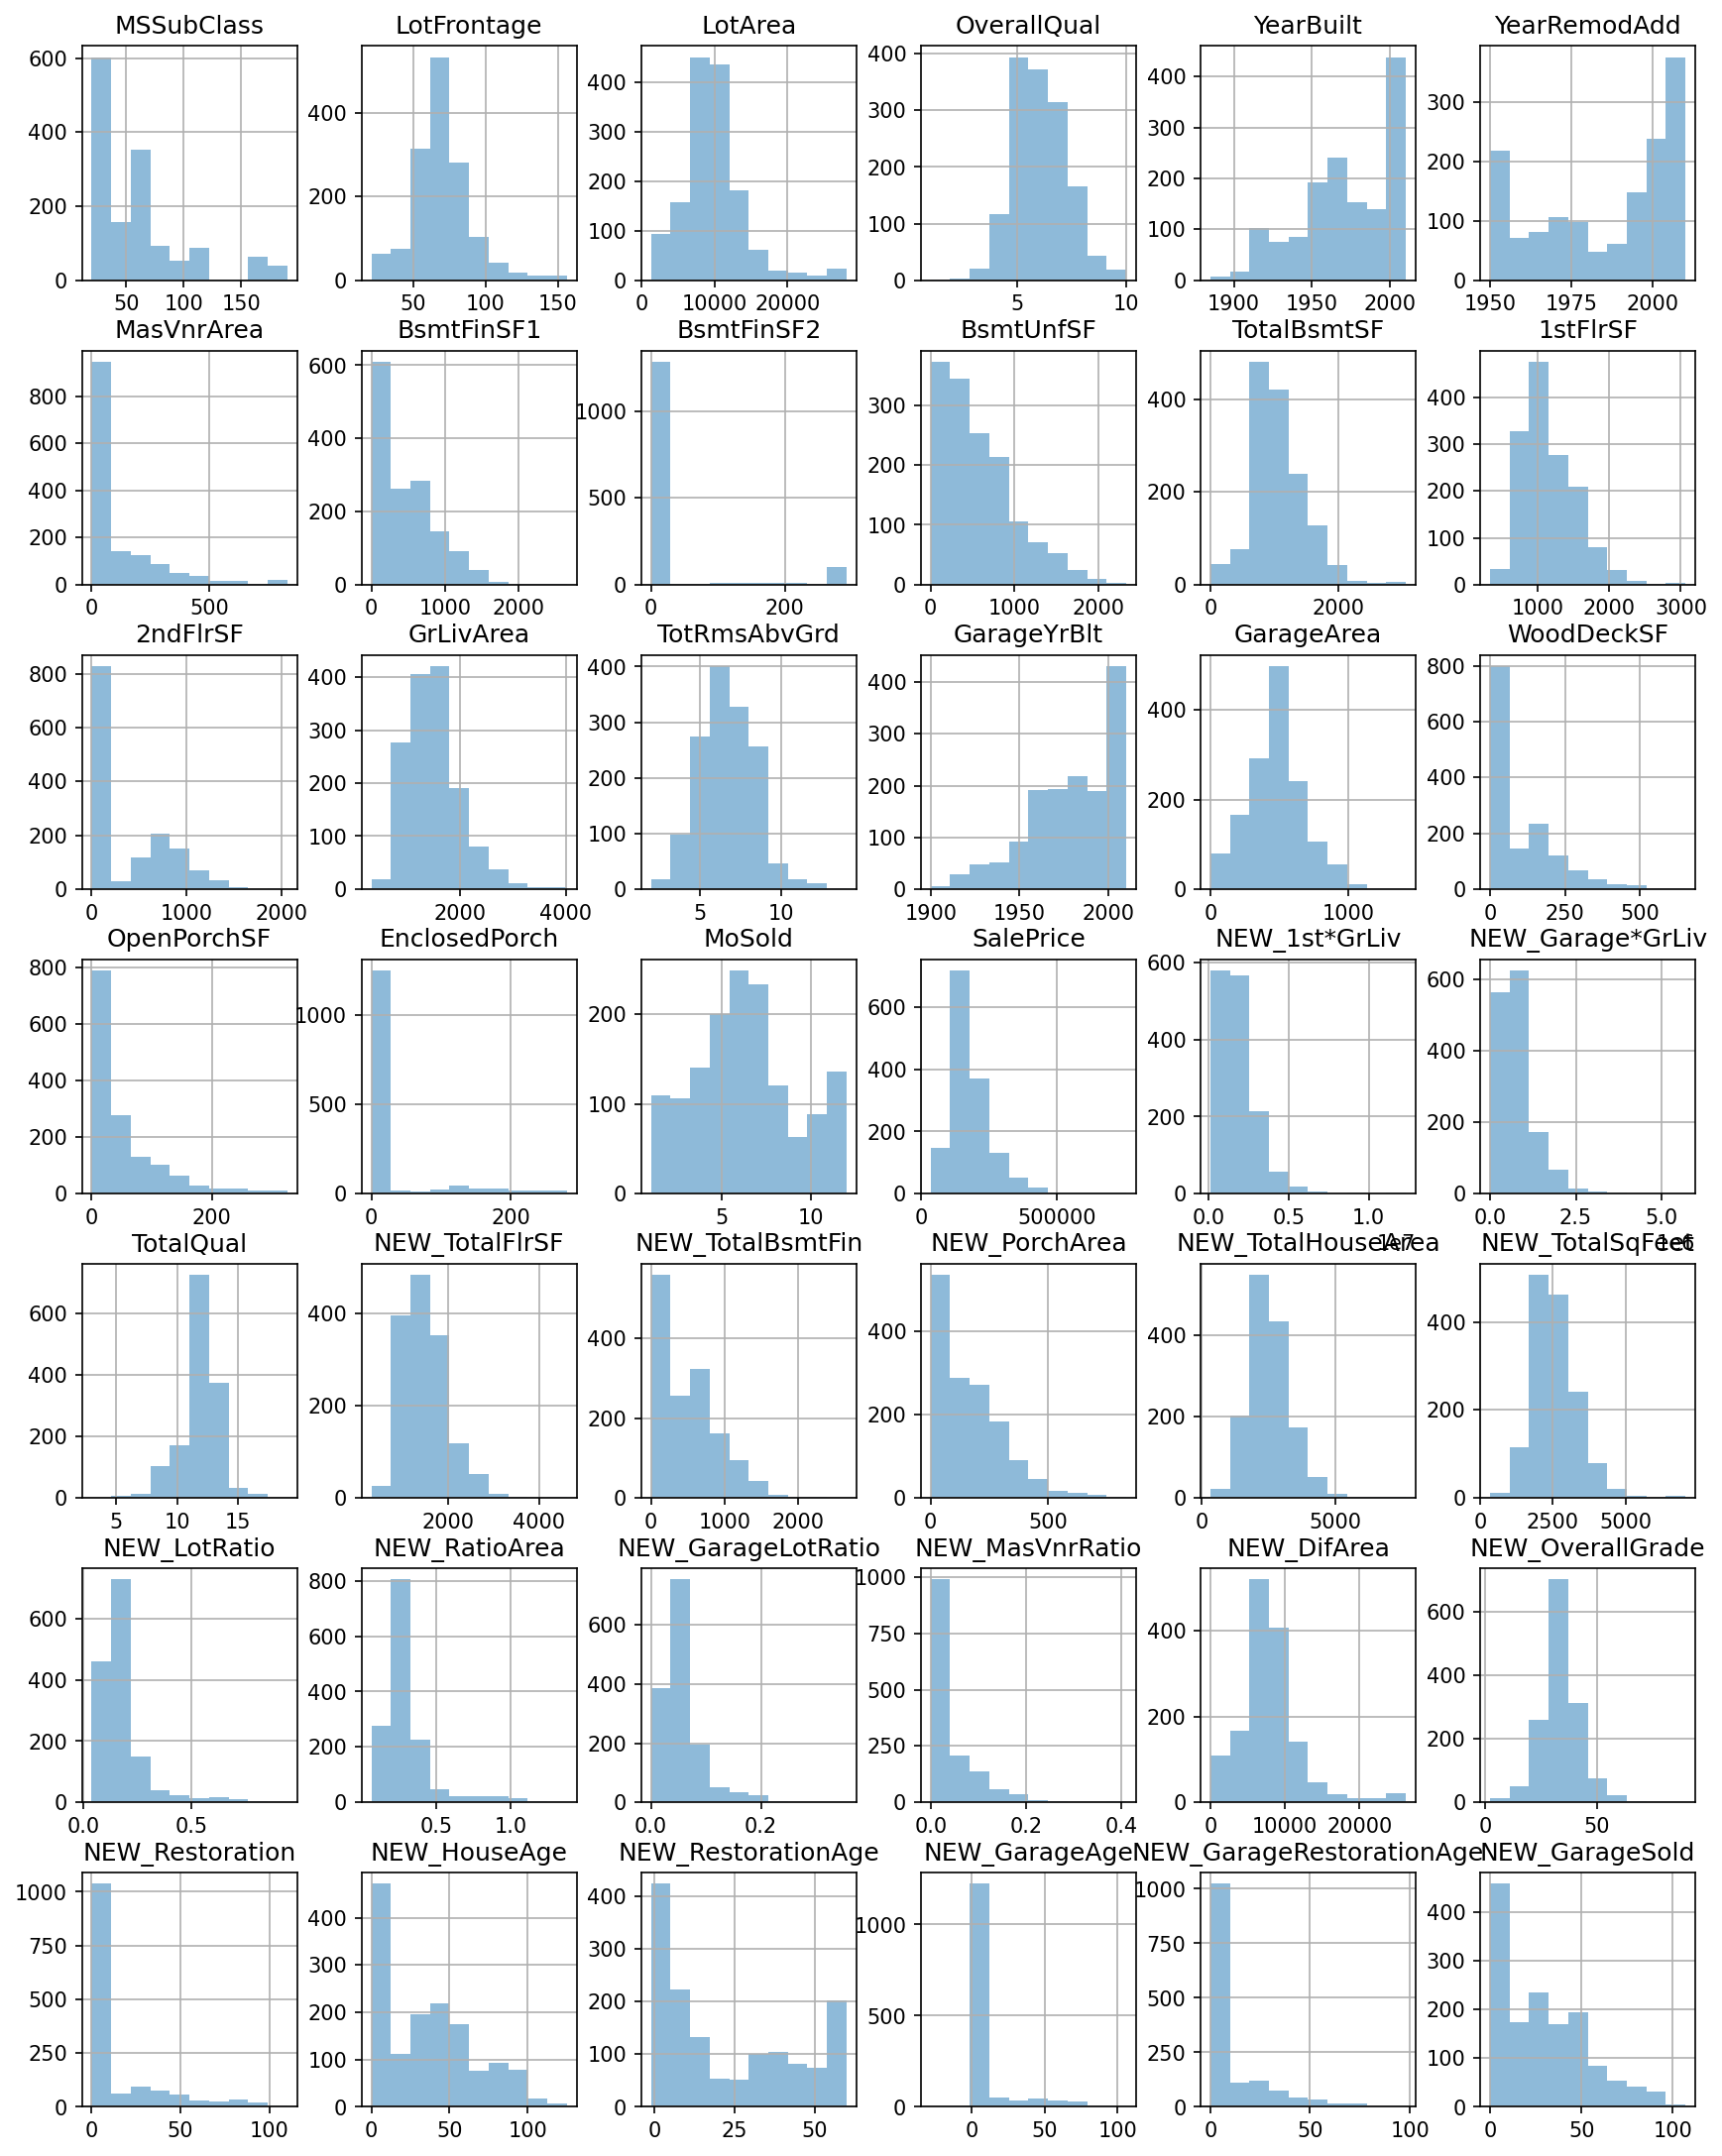

In [262]:
_ = data[num_cols].hist(figsize=(14, 18), bins=10, alpha=0.5)
plt.show()

In [263]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

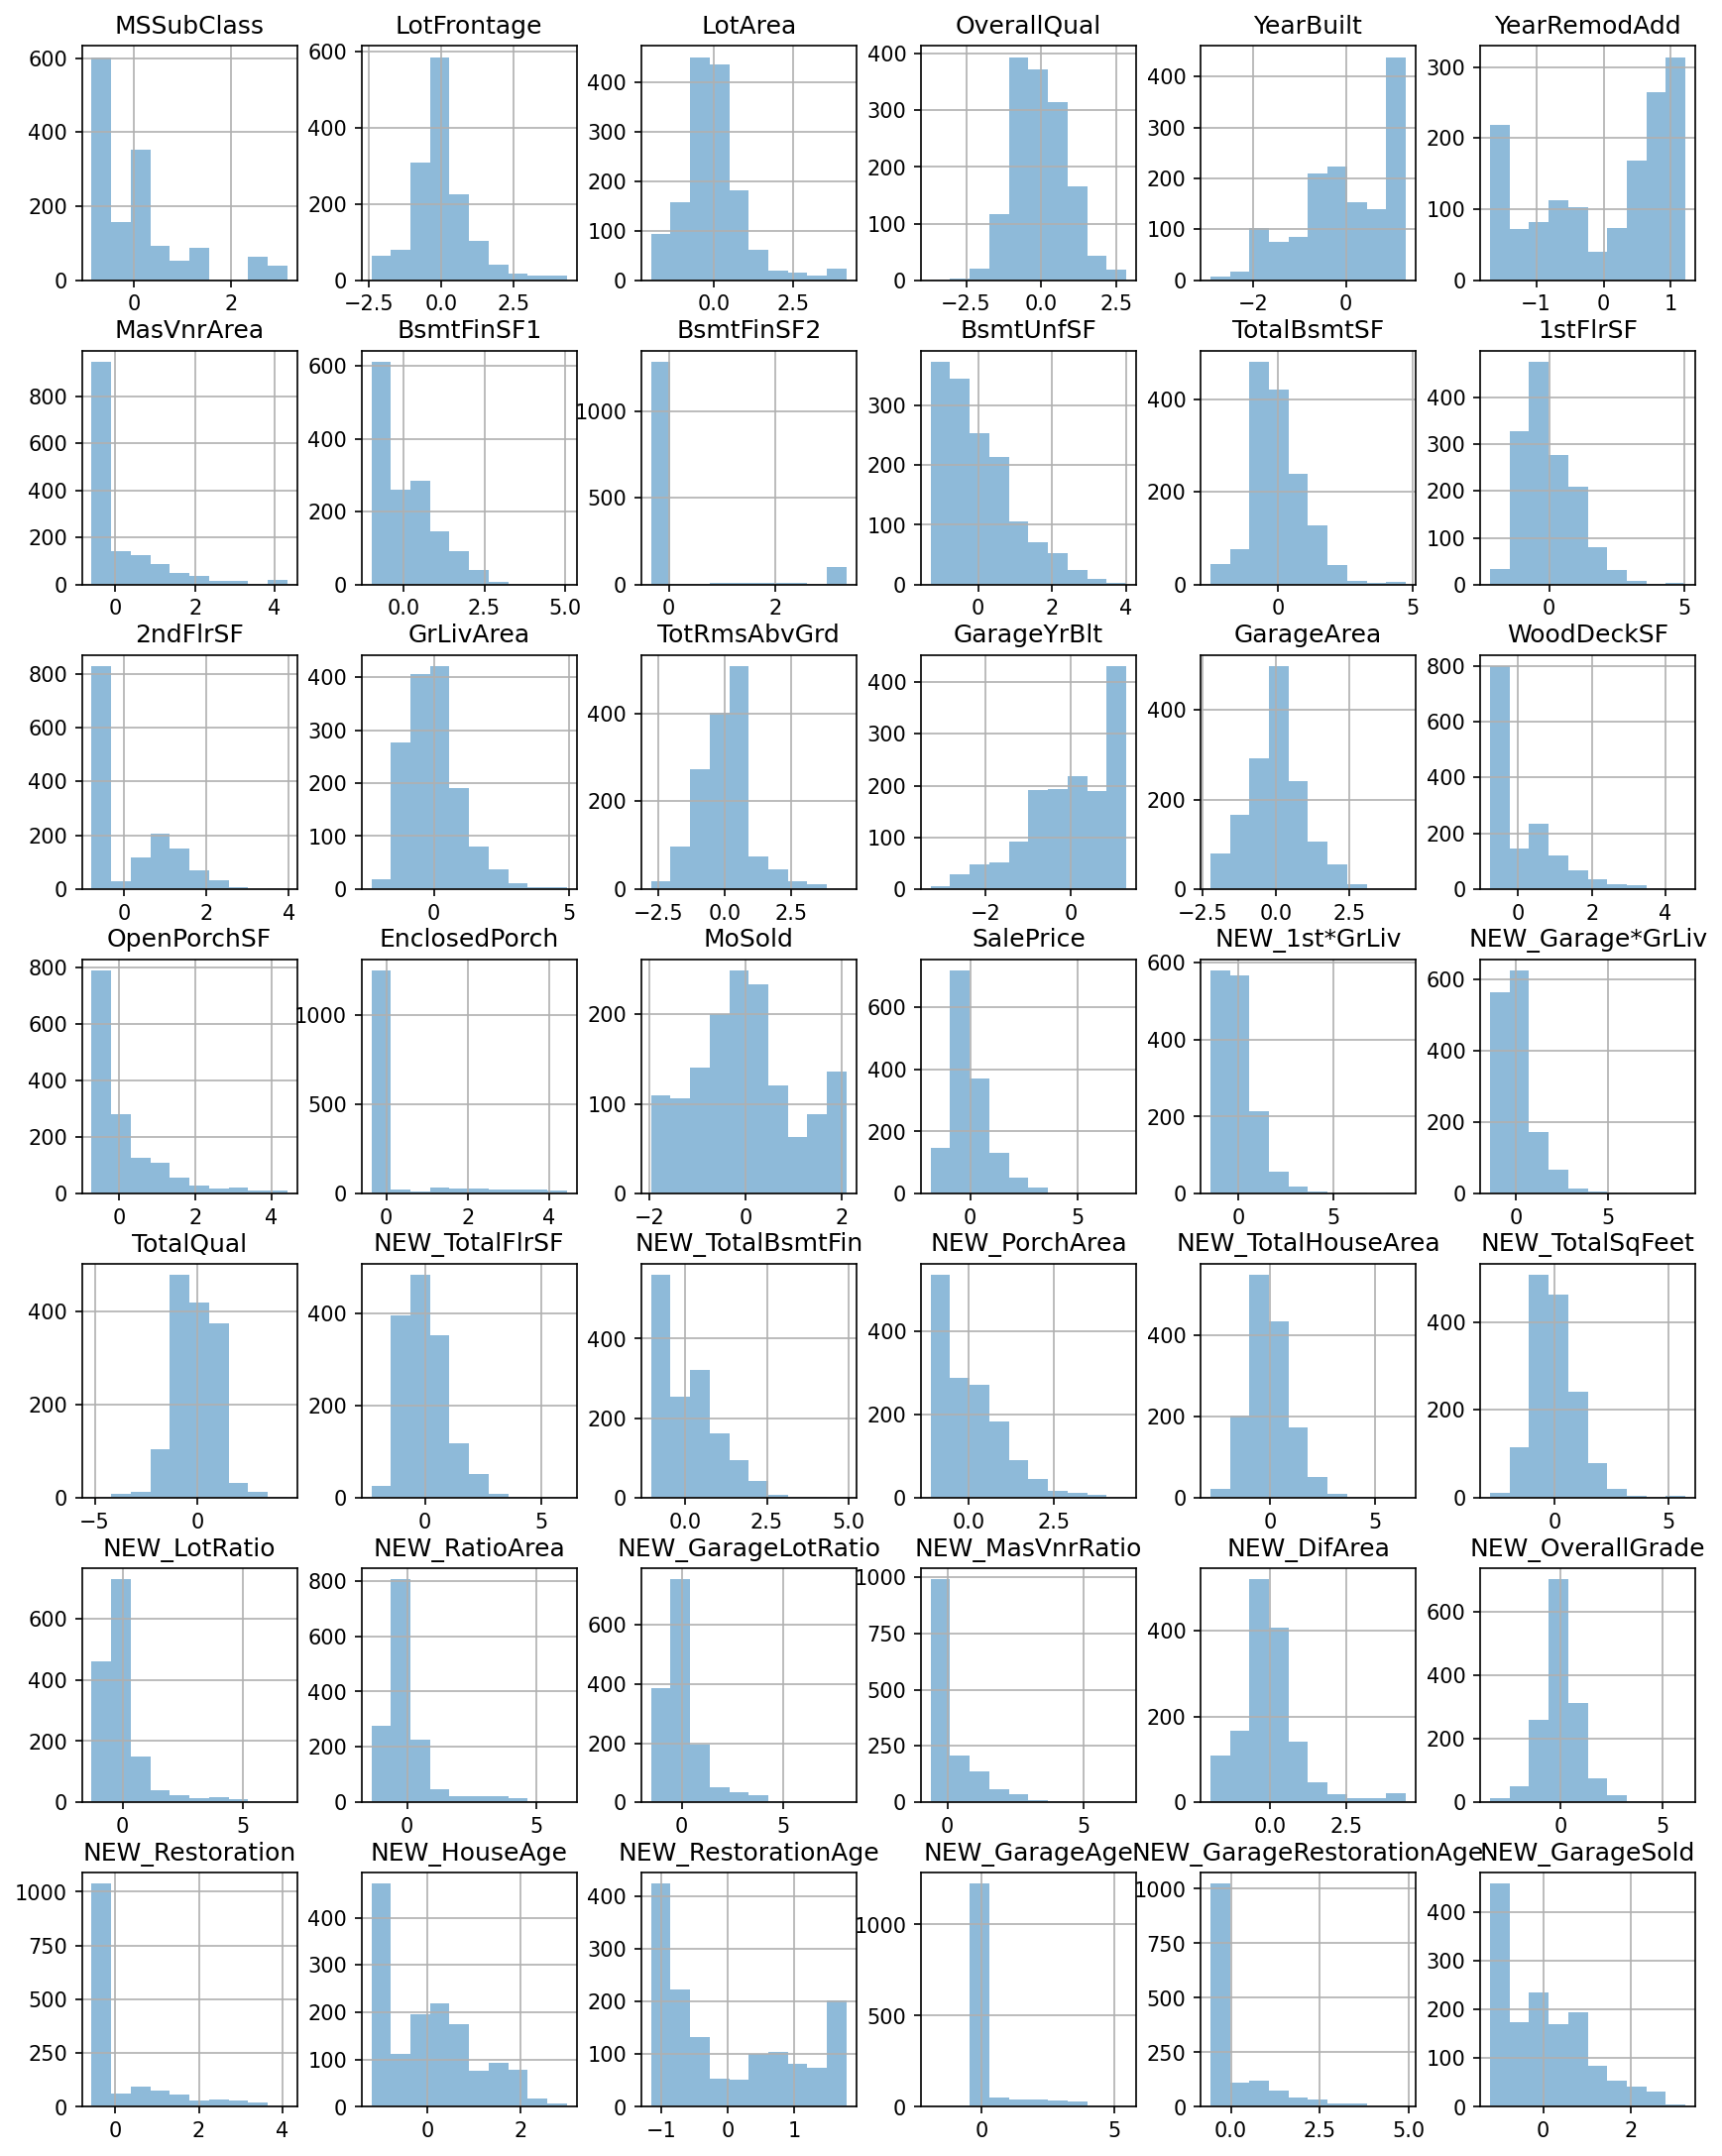

In [264]:
_ = data[num_cols].hist(figsize=(14, 18), bins=10, alpha=0.5)
plt.show()

### Split Data into Training and Testing Subsets

In [265]:
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
# Print shapes of training and testing subsets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (1159, 90)
Testing data shape: (290, 90)


In [268]:
# Save the DataFrame as a CSV file
data.to_csv('E:/Springboard Data Scientist BootCamp/PYTHON/GITHUB/HousePricePrediction/Data/FeatureEngineering.csv', index=False)

## Conclusion: Feature Engineering Summary
In this feature engineering journey, we embarked on a comprehensive examination of the dataset to glean insights and prepare it for modeling endeavors.

Feature Engineering:

Feature engineering was a key aspect of our analysis, where we created new variables based on existing ones to enrich the dataset. These engineered features spanned various aspects of the dataset, from house characteristics to age-related metrics, aiming to capture additional information for modeling purposes.

Rare Analysis and Rare Encoder Application: 

Firstly, rare classes are identified, and a rare encoder is applied. Rare classes are categorical classes with few instances, which can negatively impact the performance of classification models. These steps organize the dataset by grouping rare classes together or labeling them as 'Rare,' thereby improving model performance.

Creation of New Variables: 

Next, new variables are derived from existing ones. These new variables may be derived from combinations or transformations of existing variables. For example, calculating total areas or creating scores based on specific features.

Dropping Low Information Variables: 

Some variables may not contribute to the model's performance or may have high correlation with other variables. These variables carry low information and do not contribute to the model. Therefore, dropping these variables simplifies the dataset and reduces model complexity.

Label Encoding and One-Hot Encoding: 

Label encoding and one-hot encoding are used to convert categorical variables into numerical formats. These transformations enable machine learning models to process categorical data. Label encoding assigns a unique number to each categorical class, while one-hot encoding represents categorical classes as binary vectors.

Scale Standardization:

Scale standardization, also known as feature scaling, is performed to transform numerical features to a standard scale, typically with a mean of 0 and a standard deviation of 1. This process ensures that all features have the same scale, preventing features with larger magnitudes from dominating those with smaller magnitudes during model training.

Split Data into Training and Testing Subsets:

Finally, the dataset is split into training and testing subsets. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. This step ensures that the model's performance is assessed on unseen data, providing a more accurate estimation of its generalization ability.

As a result of these steps, the dataset becomes ready for modeling. Data preprocessing techniques such as organizing rare classes, deriving new features, converting categorical variables into numerical formats, scale standardization, and splitting data into training and testing subsets make the dataset more meaningful and effective. The processed dataset can then be used for training and evaluating machine learning algorithms.